In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,log_loss

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay

pd.options.display.float_format = '{:.2f}'.format

import warnings 
warnings.filterwarnings('ignore')

In [3]:
# load data from csv file
df = pd.read_csv("salary.csv", sep=',')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# summary
df.info()
# statistic
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,10.08,1077.65,87.30,40.44
std,13.64,105549.98,2.57,7385.29,402.96,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,237051.00,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


In [5]:
# count missing values for each column
print("Missing Value: ", sum(df.isnull().sum()))
# count duplicatte values
print("Duplicated Value: ", df.duplicated().sum())

Missing Value:  0
Duplicated Value:  24


In [6]:
# Remove duplicate
unique_records = df.drop_duplicates()
redundant_records = df[df.duplicated()]
df = df.drop_duplicates()

print("Duplicated Value: ", df.duplicated().sum())

Duplicated Value:  0


In [7]:
# Checking labels in the categorical features
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex
[' Male' ' Female']

native-country
[' United-States' ' Cuba' ' Jamaica' ' 

In [8]:
# Remove extra space
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Replace the '?' symbol with 'nan' throughout the dataset

df.replace('?', np.nan, inplace=True)

# Check the dataset features with null values ('nan')

pd.isna(df).sum()[pd.isna(df).sum() > 0]

workclass         1836
occupation        1843
native-country     582
dtype: int64

In [9]:
# Replace ths missing info  with "Unknown" label in each feature

df.workclass.fillna(value='UnknCl', inplace=True)
df.occupation.fillna(value='UnknOc', inplace=True)
df['native-country'].fillna(value='Unkn_ctry' , inplace=True)

# Check whether the modification has been made

pd.isna(df).sum()[pd.isna(df).sum() > 0]

Series([], dtype: int64)

In [10]:
# Merge goverment workclass
df.replace({'workclass': {'State-gov': 'Govt.', 'Self-emp-not-inc': 'self_emp', 'Federal-gov': 'Govt.', 'Local-gov': 'Govt.', 'Self-emp-inc':'self_emp'}}, inplace=True)
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


workclass
['Govt.' 'self_emp' 'Private' 'UnknCl' 'Without-pay' 'Never-worked']

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'UnknOc'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex
['Male' 'Female']

native-country
['United-States' 'Cuba' 'Jamaica' 'India' 'Unkn_ctry' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippin

In [11]:
# Count native countries
df['native-country'].value_counts()

# Seperate native country to two dataframes
US = df[df['native-country'] == 'United-States']
NonUS = df[df['native-country'] != 'United-States']

print('US', US.shape)
print('NonUS', NonUS.shape)

US (29153, 15)
NonUS (3384, 15)


(Text(0.5, 0, ''), Text(0, 0.5, ''), ([], []))

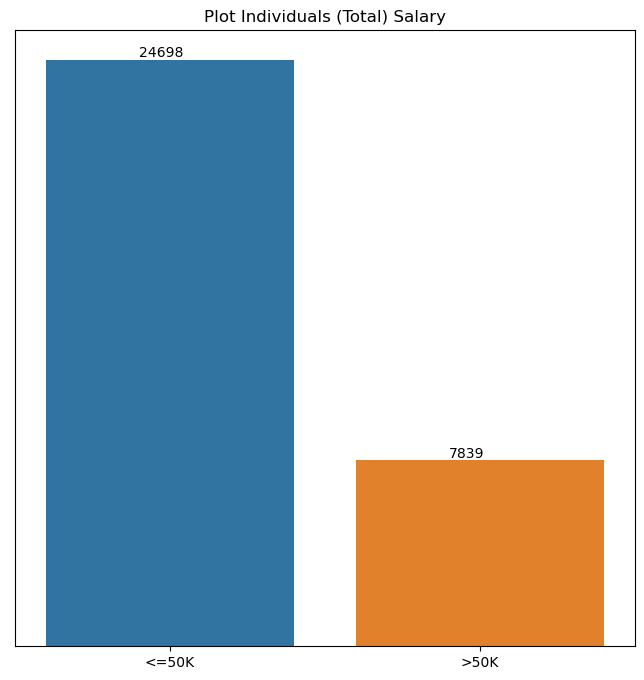

In [12]:
# Plot Individuals (Total) Salary
plt.figure(figsize=(8, 8))
salaryCount = df['salary'].value_counts()
ax = sns.countplot(x="salary", data=df, order=salaryCount.index)
plt.title('Plot Individuals (Total) Salary')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+100))
plt.xlabel(None), plt.ylabel(None), plt.yticks([])


(Text(0.5, 0, ''), Text(0, 0.5, ''), ([], []))

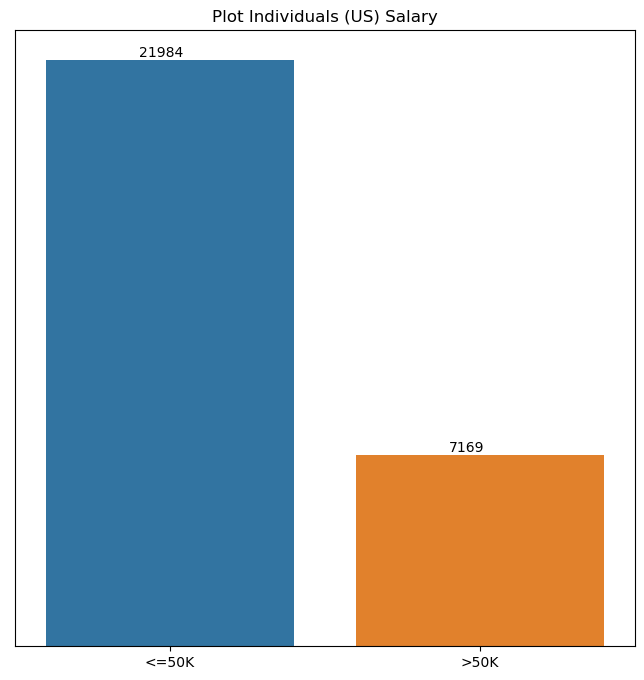

In [13]:
# Plot Individuals (US) Salary
plt.figure(figsize=(8, 8))
ax = sns.countplot(x="salary", data=US, order=salaryCount.index)
plt.title('Plot Individuals (US) Salary')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+100))
plt.xlabel(None), plt.ylabel(None), plt.yticks([])


(Text(0.5, 0, ''), Text(0, 0.5, ''), ([], []))

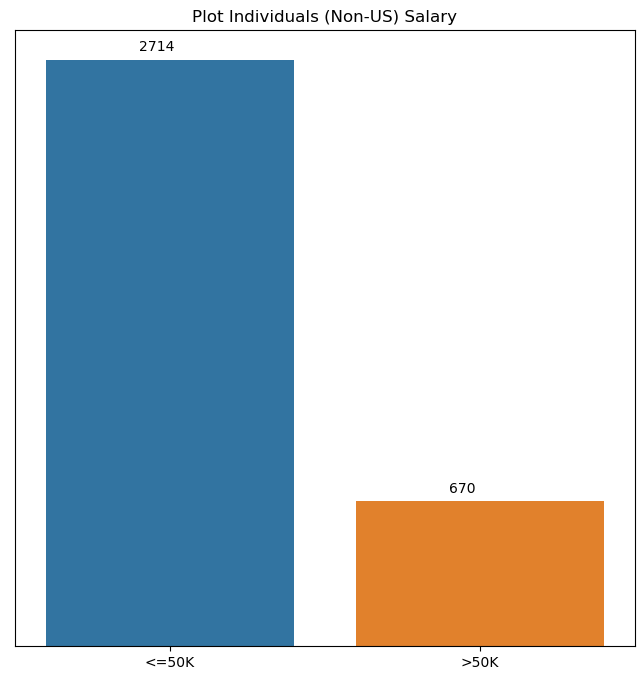

In [14]:
# Plot Individuals (Non-US) Salary
plt.figure(figsize=(8, 8))
ax = sns.countplot(x="salary", data=NonUS, order=salaryCount.index)
plt.title('Plot Individuals (Non-US) Salary')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+40))
plt.xlabel(None), plt.ylabel(None), plt.yticks([])


<AxesSubplot:>

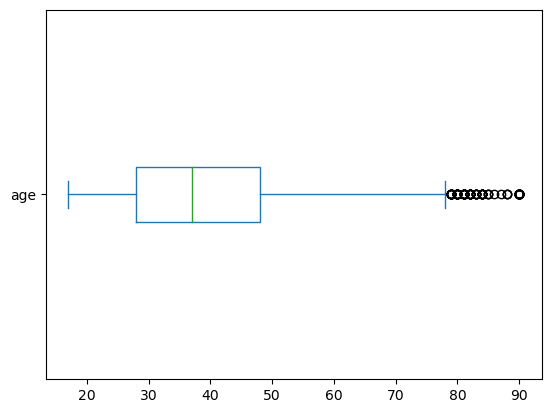

In [15]:
#Plot boxplot for 'age'
df['age'].plot.box(vert=False)

<AxesSubplot:>

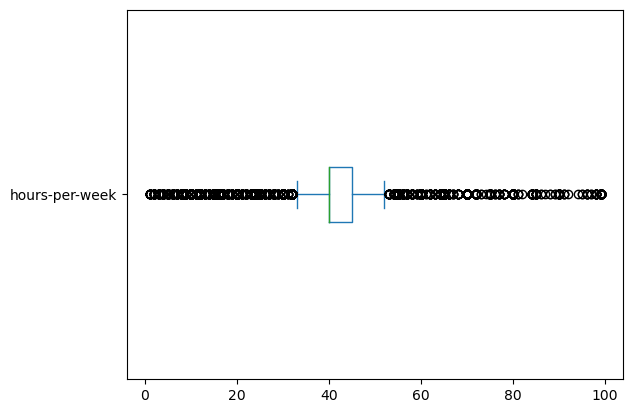

In [16]:
#Plot boxplot for 'Hours per week'
df['hours-per-week'].plot.box(vert=False)

(Text(0, 0.5, ''), ([], []), Text(0.5, 0, ''))

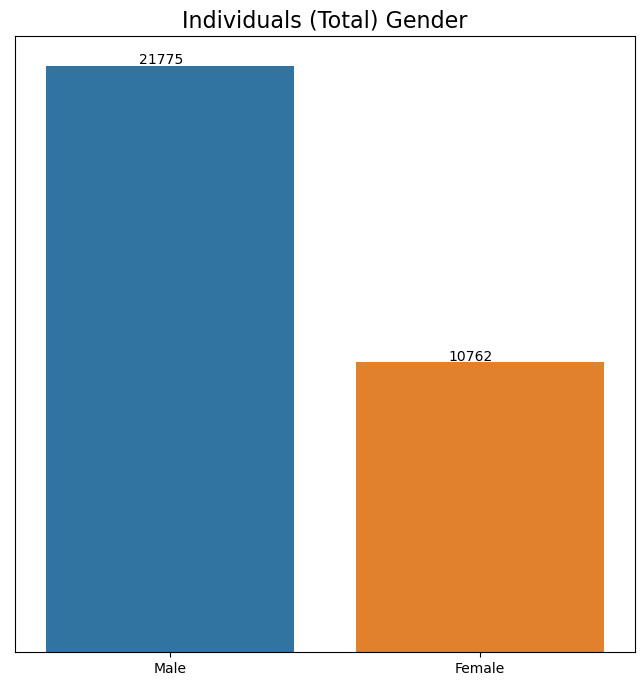

In [17]:
# Plot Individuals (Total) Gender
plt.figure(figsize=(8, 8))
plt.title('Individuals (Total) Gender',fontsize=16)
genderCount = df['sex'].value_counts()
ax = sns.countplot(x="sex", data=df, order=genderCount.index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

(Text(0, 0.5, ''), ([], []), Text(0.5, 0, ''))

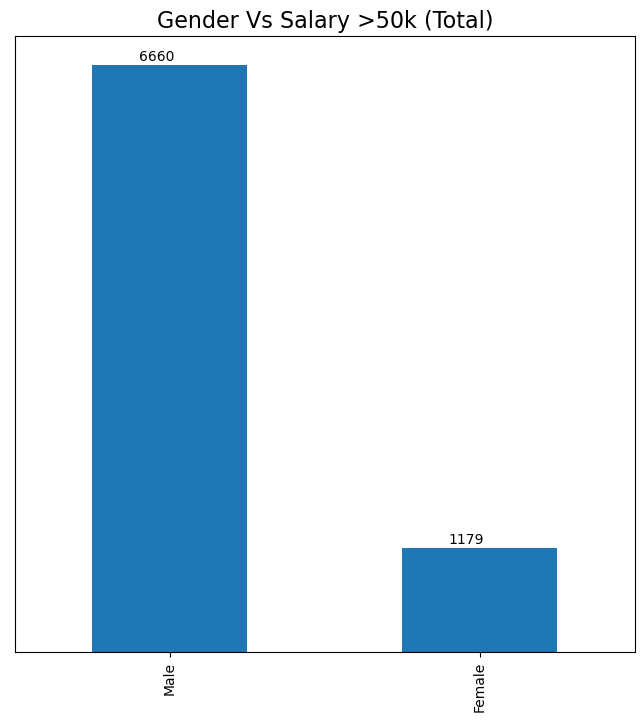

In [18]:
# Gender Vs Salary >50k (Total)
plt.figure(figsize=(8, 8))
plt.title('Gender Vs Salary >50k (Total)', fontsize=16)
ax = df[df['salary']=='>50K']['sex'].value_counts().plot(kind='bar', legend=None)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)


(Text(0, 0.5, ''), ([], []), Text(0.5, 0, ''))

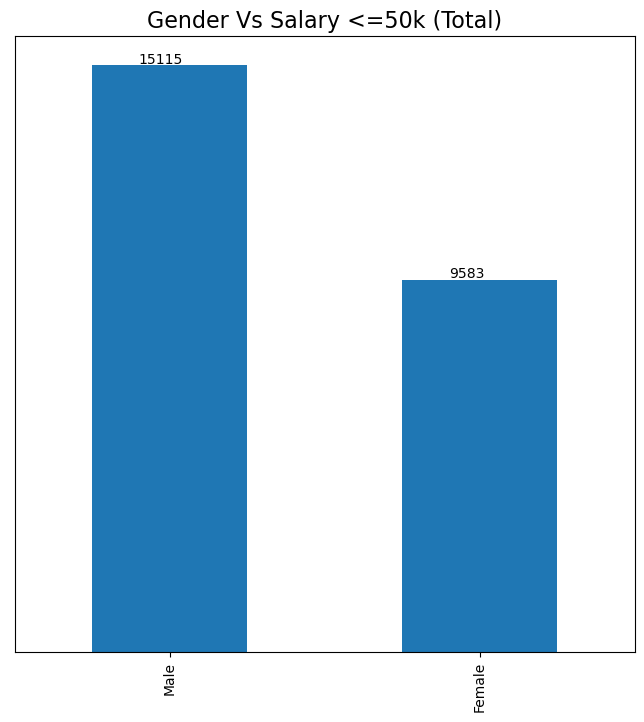

In [19]:
# Gender Vs Salary >50k (Total)
plt.figure(figsize=(8, 8))
plt.title('Gender Vs Salary <=50k (Total)', fontsize=16)
ax = df[df['salary']=='<=50K']['sex'].value_counts().plot(kind='bar', legend=None)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)


(Text(0, 0.5, ''), ([], []), Text(0.5, 0, ''))

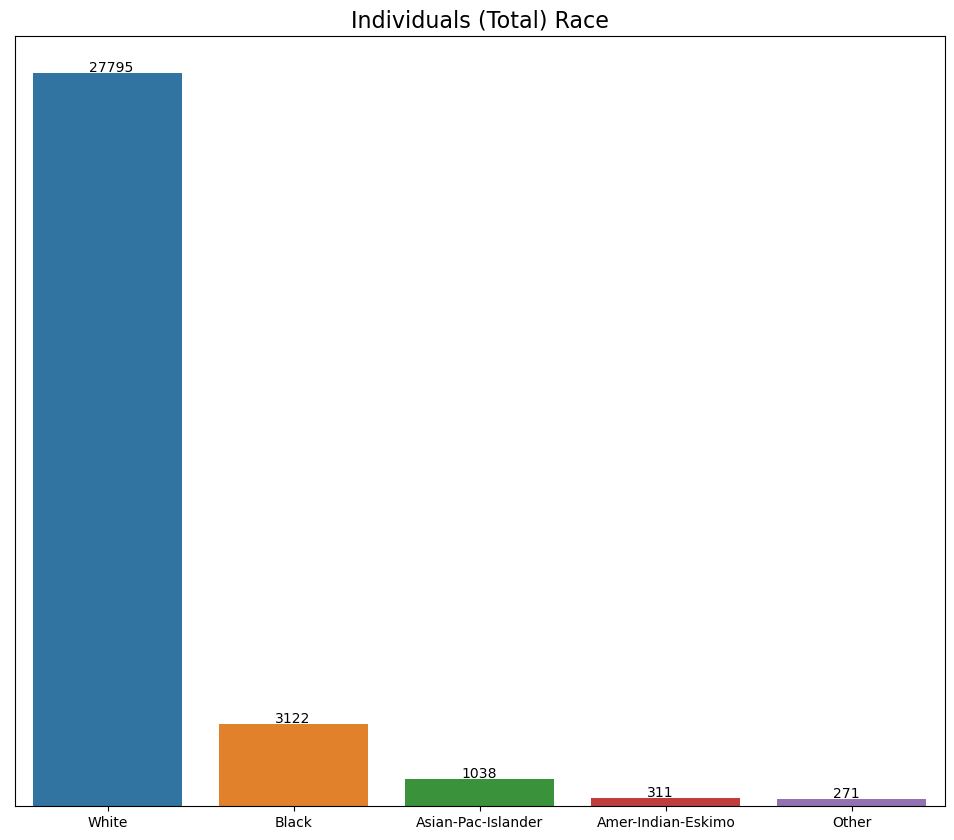

In [20]:
# Plot Individuals (Total) Race
plt.figure(figsize=(12, 10))
plt.title('Individuals (Total) Race',fontsize=16)
raceCount = df['race'].value_counts()
ax = sns.countplot(x="race", data=df, order=raceCount.index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

(Text(0, 0.5, ''), ([], []), Text(0.5, 0, ''))

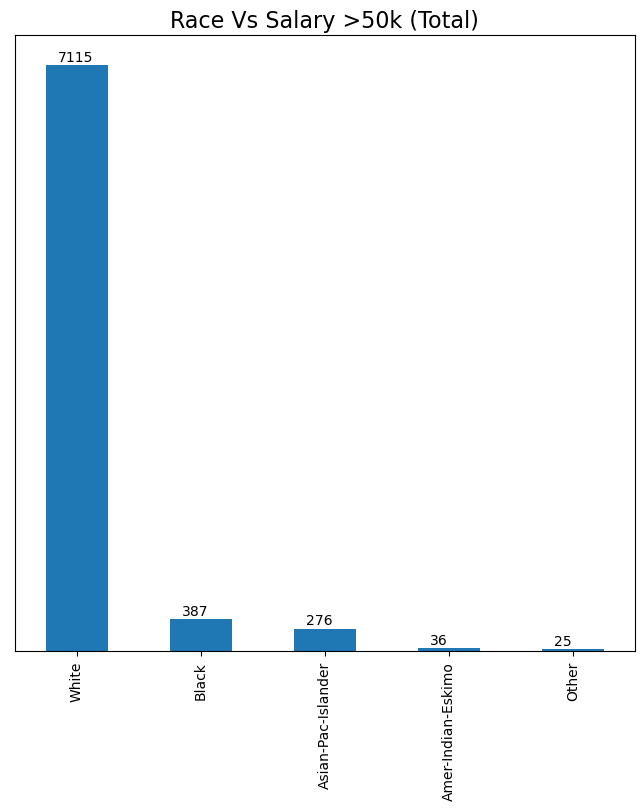

In [21]:
# Race Vs Salary >50k (Total)
plt.figure(figsize=(8, 8))
plt.title('Race Vs Salary >50k (Total)', fontsize=16)
ax = df[df['salary']=='>50K']['race'].value_counts().plot(kind='bar', legend=None)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)


(Text(0, 0.5, ''), ([], []), Text(0.5, 0, ''))

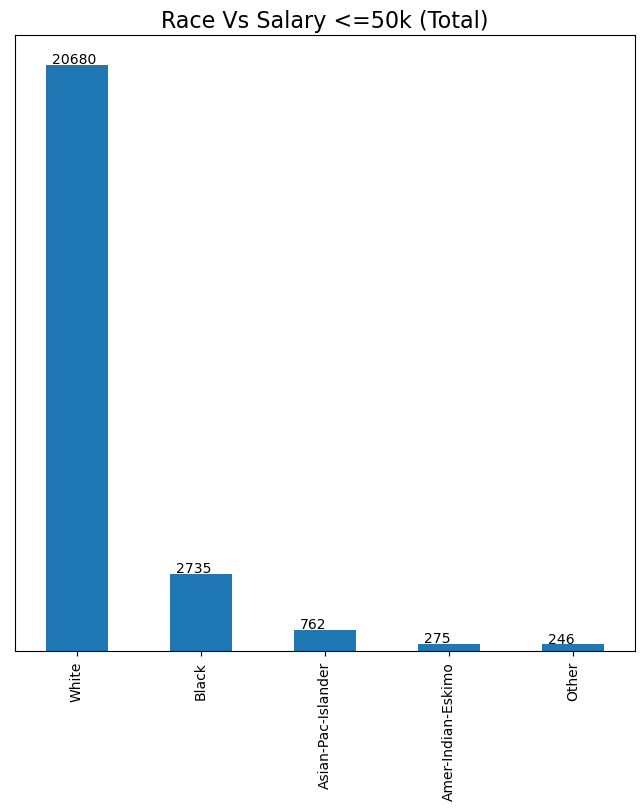

In [22]:
# Race Vs Salary <=50k (Total)
plt.figure(figsize=(8, 8))
plt.title('Race Vs Salary <=50k (Total)', fontsize=16)
ax = df[df['salary']=='<=50K']['race'].value_counts().plot(kind='bar', legend=None)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+60))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)


(Text(0, 0.5, ''), ([], []), Text(0.5, 0, ''))

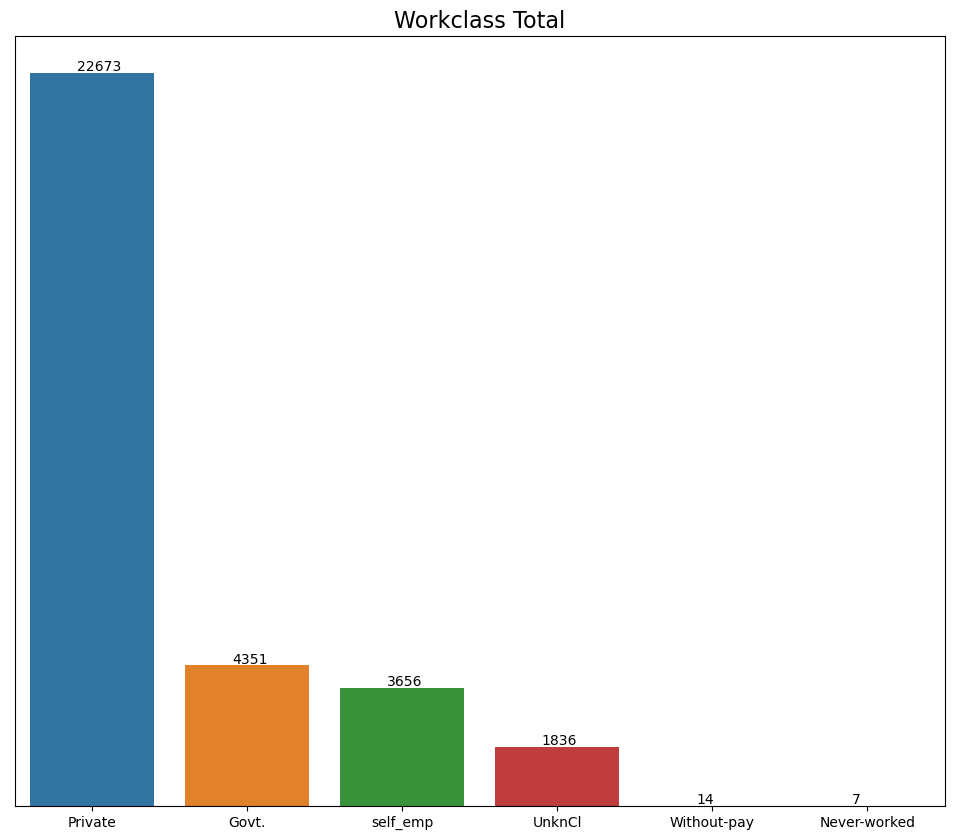

In [23]:
# Plot Individuals (Total) Workclass
plt.figure(figsize=(12, 10))
plt.title('Workclass Total',fontsize=16)
workclassCount = df['workclass'].value_counts()
ax = sns.countplot(x="workclass", data=df, order=workclassCount.index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

(Text(0, 0.5, ''), ([], []), Text(0.5, 0, ''))

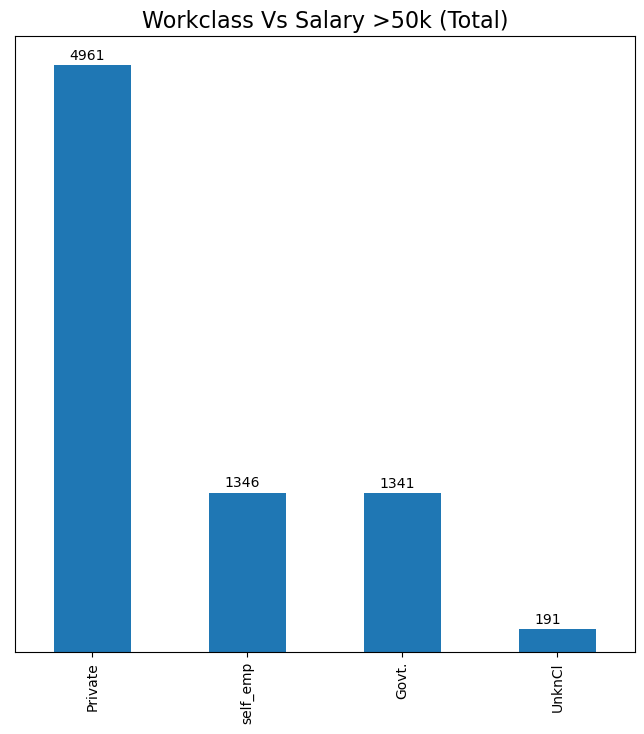

In [24]:
# Workclass Vs Salary >50k (Total)
plt.figure(figsize=(8, 8))
plt.title('Workclass Vs Salary >50k (Total)', fontsize=16)
ax = df[df['salary']=='>50K']['workclass'].value_counts().plot(kind='bar', legend=None)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)


(Text(0, 0.5, ''), ([], []), Text(0.5, 0, ''))

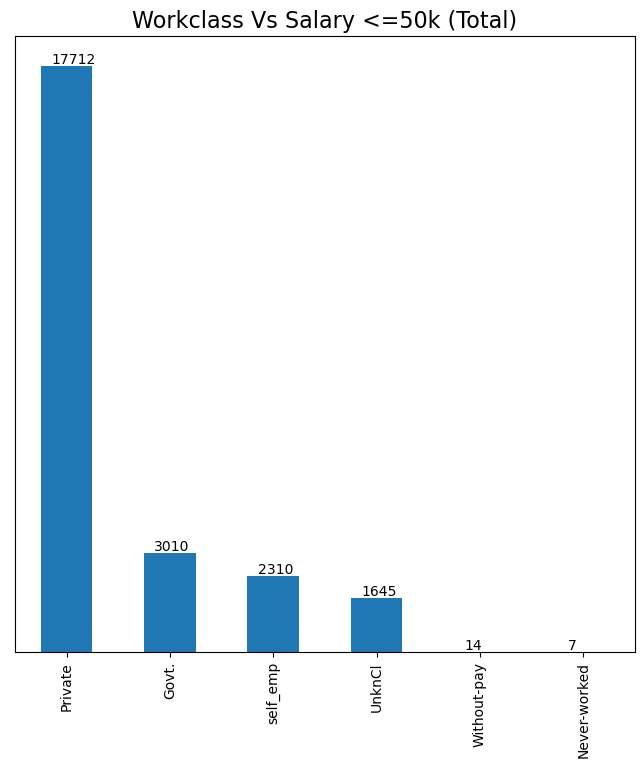

In [25]:
# Workclass Vs Salary <=50k (Total)
plt.figure(figsize=(8, 8))
plt.title('Workclass Vs Salary <=50k (Total)', fontsize=16)
ax = df[df['salary']=='<=50K']['workclass'].value_counts().plot(kind='bar', legend=None)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)


(Text(0, 0.5, ''), ([], []), Text(0.5, 0, ''))

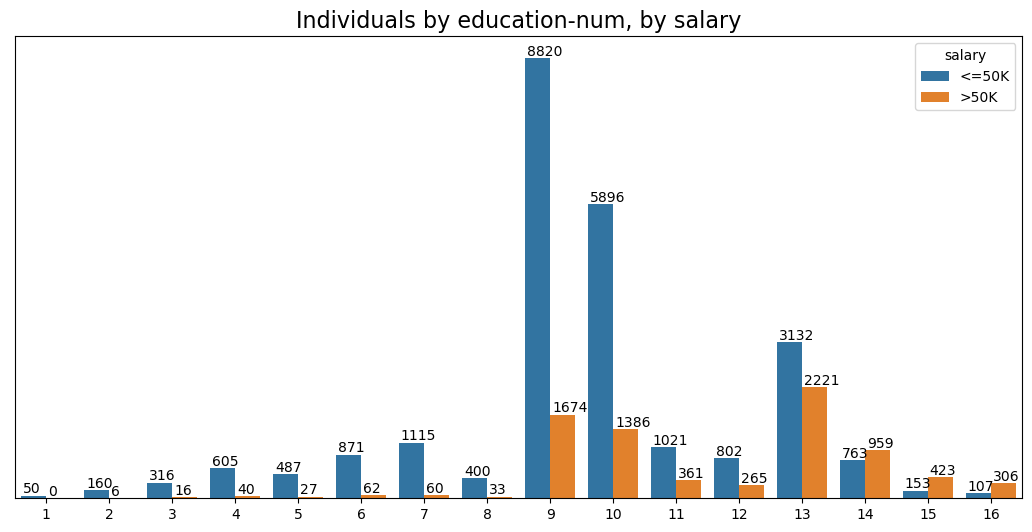

In [26]:
# Plot Individuals Education-num and Salary
plt.figure(figsize=(13,6))
plt.title('Individuals by education-num, by salary', fontsize=16)
ax = sns.countplot(x='education-num', hue='salary', data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)


In [27]:
# Grouping the features into numerical & categorical 
num_df = df[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']] 
cat_df = df[['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'salary']]

In [28]:
# Label encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder ()

for i in cat_df:
    cat_df[i] = le.fit_transform(df[i])

# Joining the data to the numeric data
main_df = pd.concat([num_df, cat_df], axis=1)
main_df.head(5)

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,77516,2174,0,40,0,9,12,4,0,1,4,1,38,0
1,50,83311,0,0,13,5,9,12,2,3,0,4,1,38,0
2,38,215646,0,0,40,2,11,8,0,5,1,4,1,38,0
3,53,234721,0,0,40,2,1,6,2,5,0,2,1,38,0
4,28,338409,0,0,40,2,9,12,2,9,5,2,0,4,0


In [29]:
# Checking shewness features
main_df.skew(axis=0).sort_values(ascending=False)

capital-gain     11.95
capital-loss      4.59
fnlwgt            1.45
salary            1.21
relationship      0.79
workclass         0.71
age               0.56
hours-per-week    0.23
occupation        0.13
marital-status   -0.01
education-num    -0.31
sex              -0.72
education        -0.93
race             -2.44
native-country   -4.24
dtype: float64

In [30]:
# Scaling process
minmaxsca = MinMaxScaler() # Normalization
stdsca = StandardScaler() # Standardization

main_df['marital-status'] = stdsca.fit_transform(main_df[['marital-status']])
main_df['sex'] = stdsca.fit_transform(main_df[['sex']])
main_df['relationship'] = stdsca.fit_transform(main_df[['relationship']])
main_df['hours-per-week'] = stdsca.fit_transform(main_df[['hours-per-week']])
main_df['age'] = stdsca.fit_transform(main_df[['age']])
main_df['education'] = stdsca.fit_transform(main_df[['education']])
main_df['occupation'] = stdsca.fit_transform(main_df[['occupation']])
main_df['education-num'] = stdsca.fit_transform(main_df[['education-num']])

main_df['workclass'] = minmaxsca.fit_transform(main_df[['workclass']])
main_df['capital-gain'] = minmaxsca.fit_transform(main_df[['capital-gain']])
main_df['capital-loss'] = minmaxsca.fit_transform(main_df[['capital-loss']])
main_df['native-country'] = minmaxsca.fit_transform(main_df[['native-country']])
main_df['race'] = stdsca.fit_transform(main_df[['race']])

main_df.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country,salary
0,0.03,77516,0.02,0.00,-0.04,0.00,-0.34,1.13,0.92,-1.48,-0.28,0.39,0.70,0.93,0
1,0.84,83311,0.00,0.00,-2.22,1.00,-0.34,1.13,-0.41,-0.79,-0.90,0.39,0.70,0.93,0
2,-0.04,215646,0.00,0.00,-0.04,0.40,0.18,-0.42,-1.73,-0.33,-0.28,0.39,0.70,0.93,0
3,1.06,234721,0.00,0.00,-0.04,0.40,-2.40,-1.20,-0.41,-0.33,-0.90,-1.96,0.70,0.93,0
4,-0.78,338409,0.00,0.00,-0.04,0.40,-0.34,1.13,-0.41,0.60,2.21,-1.96,-1.42,0.10,0


In [31]:
# Checking the corrleation of features with the target variable (salary)
corr_matrix = main_df.corr()
corr_matrix['salary'].sort_values(ascending=False)

salary            1.00
education-num     0.34
age               0.23
hours-per-week    0.23
capital-gain      0.22
sex               0.22
capital-loss      0.15
education         0.08
race              0.07
workclass         0.03
native-country    0.02
occupation        0.01
fnlwgt           -0.01
marital-status   -0.20
relationship     -0.25
Name: salary, dtype: float64

In [46]:
# Segregating the Dependent Variable in Y-axis and Independent Variables in X-axis
# And removing the features that are considered insignificant

X = main_df.drop(columns=["salary", "fnlwgt", "education", "race", "workclass", "native-country", "occupation", "marital-status", "relationship"])
y = main_df["salary"]

# Scaling the data
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [33]:
# Split training data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, stratify=y)

In [47]:
Model = [
    LogisticRegression(),
    SVC(kernel="rbf", C=0.025, probability=True),
]

# Logging for Visual Comparison
log_cols=["Model", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in Model:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print('________________________________________')
    print(name)
    
    test_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, test_predictions)
    print("Accuracy: {:.5%}".format(acc))
    
    test_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, test_predictions)
    print("Log Loss: {:.5}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

print('________________________________________')

________________________________________
LogisticRegression
Accuracy: 82.00676%
Log Loss: 0.39099
________________________________________
SVC
Accuracy: 83.65089%
Log Loss: 0.37257
________________________________________


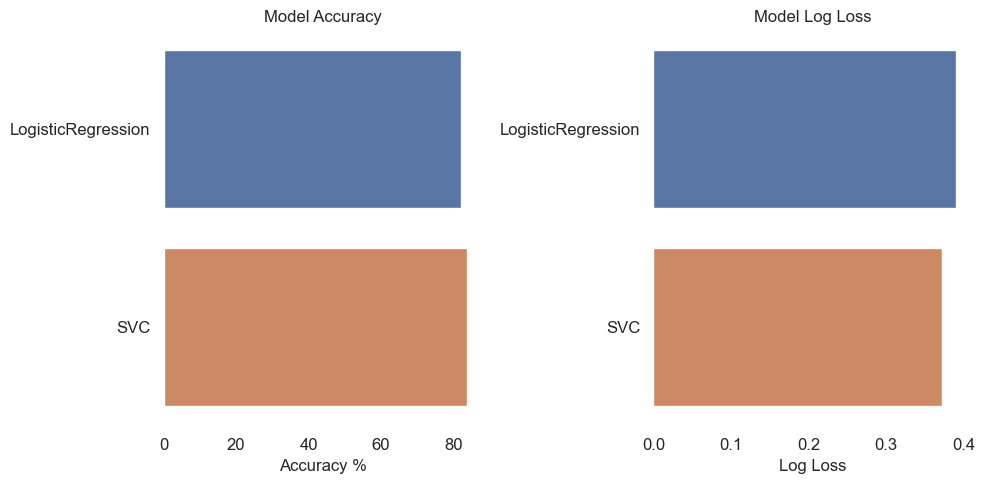

In [48]:
# Visualising the accuracy & log loss data
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':12,'ytick.labelsize':12, 'figure.autolayout':True})
plt.subplots(figsize=(10,5))

plt.subplot(1,2,1)
sns.set_color_codes("bright")
sns.barplot(x='Accuracy', y='Model', data=log)
plt.title('Model Accuracy', fontdict={'fontsize':12})
plt.ylabel(None), plt.xlabel('Accuracy %')

plt.subplot(1,2,2)
sns.set_color_codes("bright")
sns.barplot(x='Log Loss', y='Model', data=log)
plt.title('Model Log Loss', fontdict={'fontsize':12})
plt.ylabel(None), plt.xlabel('Log Loss')

plt.show()

Accuracy:  83.65
Confusion Matrix in Numbers
[[4727  213]
 [ 851  717]]


 Confusion Matrix in Percentage
[[0.96 0.04]
 [0.54 0.46]]



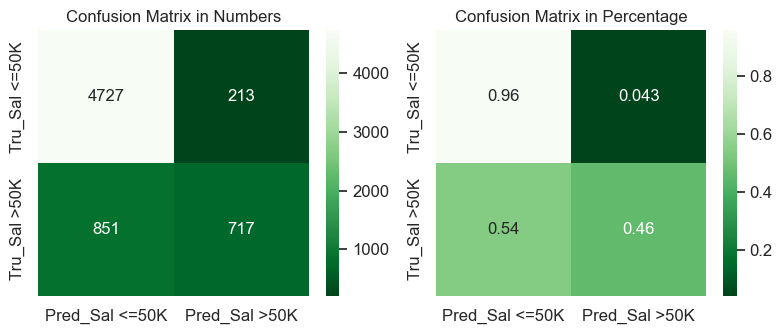

In [49]:
svc = SVC(kernel="rbf", C=0.025, probability=True)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
acc = round(svc.score(X_test, y_test) * 100, 2)
print("Accuracy: ",acc)

class_names = ['Salary <=50K', 'Salary >50K']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('\n', 'Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['Tru_Sal <=50K', 'Tru_Sal >50K']
predicted_class_names = ['Pred_Sal <=50K', 'Pred_Sal >50K']

main_df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

main_df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.subplots(figsize = (8,3.5))

plt.subplot(1,2,1)
plt.title("Confusion Matrix in Numbers", fontdict={'fontsize':12})
sns.heatmap(main_df_cnf_matrix, cmap='Greens_r', annot=True, fmt='d')

plt.subplot(1,2,2)
plt.title("Confusion Matrix in Percentage", fontdict={'fontsize':12})
sns.heatmap(main_df_cnf_matrix_percent, cmap='Greens_r', annot=True)

plt.show()

Accuracy:  82.01
Confusion Matrix in Numbers
[[4658  282]
 [ 889  679]]


 Confusion Matrix in Percentage
[[0.94 0.06]
 [0.57 0.43]]



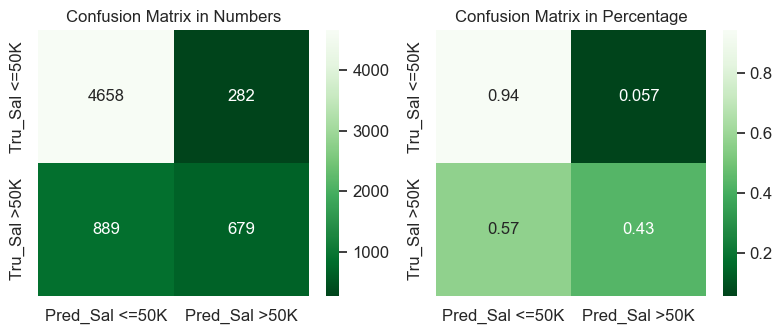

In [37]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

lg_y_pred = lg.predict(X_test)
lg_acc = round(lg.score(X_test, y_test) * 100, 2)
print("Accuracy: ",lg_acc)

# Compute confusion matrix
lg_cnf_matrix = confusion_matrix(y_test, lg_y_pred)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (lg_cnf_matrix)
print ('')

lg_cnf_matrix_percent = lg_cnf_matrix.astype('float') / lg_cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('\n', 'Confusion Matrix in Percentage')
print (lg_cnf_matrix_percent)
print ('')

lg_main_df_cnf_matrix = pd.DataFrame(lg_cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

lg_main_df_cnf_matrix_percent = pd.DataFrame(lg_cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.subplots(figsize = (8,3.5))

plt.subplot(1,2,1)
plt.title("Confusion Matrix in Numbers", fontdict={'fontsize':12})
sns.heatmap(lg_main_df_cnf_matrix, cmap='Greens_r', annot=True, fmt='d')

plt.subplot(1,2,2)
plt.title("Confusion Matrix in Percentage", fontdict={'fontsize':12})
sns.heatmap(lg_main_df_cnf_matrix_percent, cmap='Greens_r', annot=True)

plt.show()

In [38]:
# Prepare a classification report for test data of SVC
print("\t\t\t\tSVC")
print(classification_report(y_test, y_pred))
print("_________________________________________________________")

# Prepare a classification report for test data of Logistic Regression
print("\t\t\tLogistic Regression")
print(classification_report(y_test, lg_y_pred)) # type: ignore


				SVC
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4940
           1       0.77      0.46      0.57      1568

    accuracy                           0.84      6508
   macro avg       0.81      0.71      0.74      6508
weighted avg       0.83      0.84      0.82      6508

_________________________________________________________
			Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4940
           1       0.71      0.43      0.54      1568

    accuracy                           0.82      6508
   macro avg       0.77      0.69      0.71      6508
weighted avg       0.81      0.82      0.80      6508



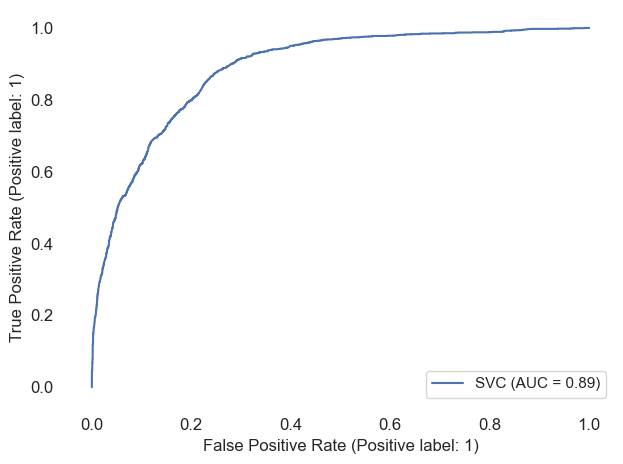

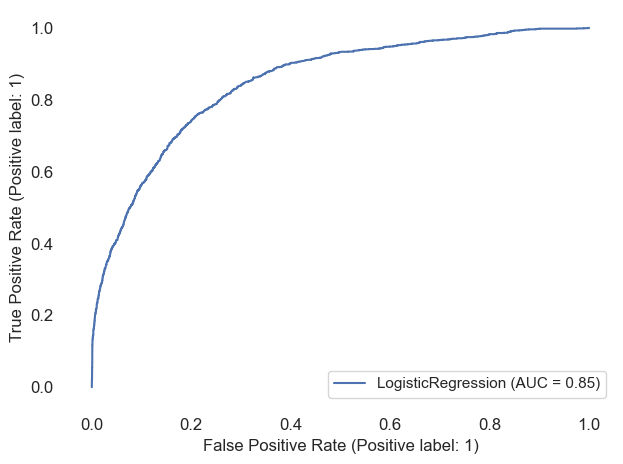

In [39]:
# Plot ROC curve and calculate AUC metric for test data
disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
lg_disp = RocCurveDisplay.from_estimator(lg, X_test, y_test)